In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# Enter foldername
FOLDERNAME = 'cs231n/DeepDoughnut'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Ensures Python interpreter of Colab VM can load python files.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

#Set your path
path='/content/drive/Shared drives/DeepDoughnut'


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Initialize the model
file_name = os.path.join(path, 'models_aws', 'resnet_FULL.pt')
print(file_name)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features,20) 
model.load_state_dict(torch.load(file_name))
model.eval()

# Set the model to run on the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set the model on Eval Mode
model.eval()

/content/drive/Shared drives/DeepDoughnut/models_aws/resnet_FULL.pt


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision import transforms
from PIL import Image

# Open the image file
image_file  = os.path.join(path,  '004404_0.jpg')
image = Image.open(image_file)

# Set up the transformations
transform_ = transforms.Compose([
			transforms.Resize(224), # i.e. want 224 by 224 
			transforms.CenterCrop(224), 
			transforms.ToTensor(), 
			transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
		])

# Transforms the image
image = transform_(image).to(device)
image = image.unsqueeze(dim=0)
image.requires_grad_()
# image.requires_grad = True

tensor([[[[-1.3130, -1.2103, -1.1589,  ..., -1.6042, -1.5357, -1.4672],
          [-1.2103, -1.0390, -0.9192,  ..., -1.0562, -0.9877, -0.9705],
          [ 0.2796,  0.3823,  0.5022,  ..., -0.5938, -0.9020, -0.5253],
          ...,
          [-0.1143,  0.0741,  0.2796,  ..., -0.9192, -0.9192, -0.9877],
          [-0.0629,  0.1254,  0.0569,  ..., -1.0048, -0.9363, -0.9192],
          [-0.4226, -0.5253, -0.9877,  ..., -1.3987, -1.3473, -1.2617]],

         [[-1.2829, -1.2129, -1.1954,  ..., -1.3880, -1.4055, -1.3179],
          [-1.1253, -1.0028, -0.9153,  ..., -0.7927, -0.7927, -0.7927],
          [ 0.4153,  0.4853,  0.5728,  ...,  0.1877, -0.2150, -0.0399],
          ...,
          [-0.0049,  0.1702,  0.3803,  ..., -0.7927, -0.7927, -0.8452],
          [ 0.0301,  0.2227,  0.1527,  ..., -0.8803, -0.8102, -0.7752],
          [-0.3200, -0.4426, -0.9153,  ..., -1.2829, -1.2304, -1.1429]],

         [[-1.1247, -1.0724, -1.0898,  ..., -1.3513, -1.3164, -1.2990],
          [-1.0201, -0.9330, -

In [ ]:
# Retrieve output from the image
output = model(image)

# Catch the output
output_idx = output.argmax()
output_max = output[0, output_idx]

# Do backpropagation to get the derivative of the output based on the image
output_max.backward()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


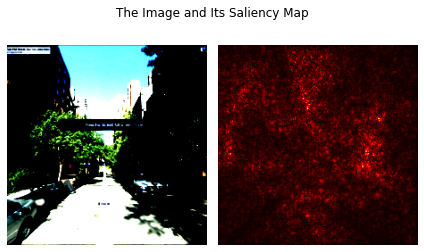

In [ ]:
# Retireve the saliency map and also pick the maximum value from channels on each pixel.
# In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
saliency = saliency.reshape(224, 224)

# Reshape the image
image = image.reshape(-1, 224, 224)

# Visualize the image and the saliency map
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
ax[0].axis('off')
ax[1].imshow(saliency.cpu(), cmap='hot')
ax[1].axis('off')
plt.tight_layout()
fig.suptitle('The Image and Its Saliency Map')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


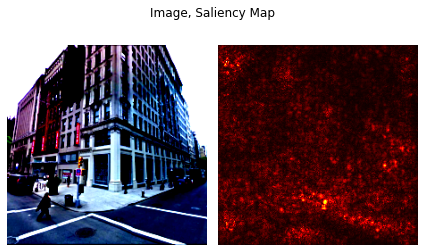

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


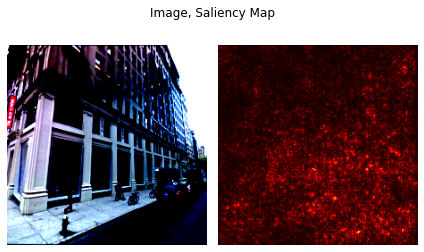

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


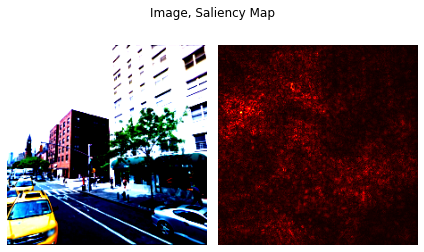

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


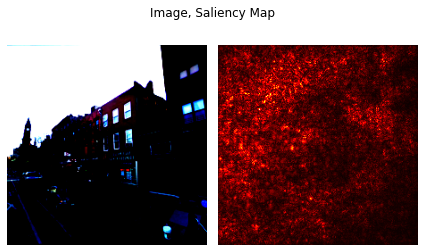

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


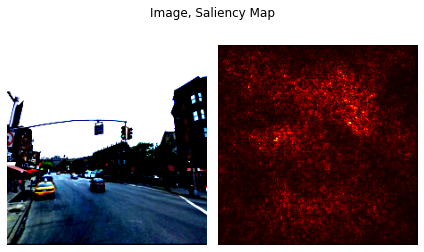

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


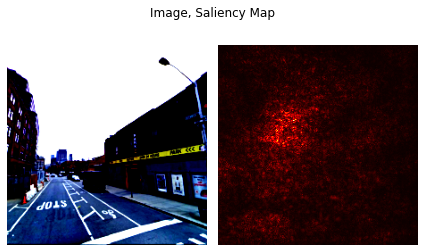

In [ ]:

# Open the image file
#737 742 2974 #2128
#nums = ['000737_0', '000742_0', '002974_0', '002128_0']
nums = ['005202_0', '005203_0', '005234_0', '005238_0', '005285_0', '005354_0']
for image_number in nums: 
  #image_number = '005202_0'
  #'manhattan',

  image_file  = os.path.join(path,  'saliency_map_imgs', 'manhattan', image_number+'.jpg')
  image = Image.open(image_file)

  # Set up the transformations
  transform_ = transforms.Compose([
        transforms.Resize(224), # i.e. want 224 by 224 
        transforms.CenterCrop(224), 
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ])

  # Transforms the image
  image = transform_(image).to(device)
  image = image.unsqueeze(dim=0)
  image.requires_grad_()
  # image.requires_grad = True

  # Retrieve output from the image
  output = model(image)

  # Catch the output
  output_idx = output.argmax()
  output_max = output[0, output_idx]

  # Do backpropagation to get the derivative of the output based on the image
  output_max.backward()

  # Retireve the saliency map and also pick the maximum value from channels on each pixel.
  # In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
  saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
  saliency = saliency.reshape(224, 224)

  # Reshape the image
  image = image.reshape(-1, 224, 224)

  # Visualize the image and the saliency map
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
  ax[0].axis('off')
  ax[1].imshow(saliency.cpu(), cmap='hot')
  ax[1].axis('off')
  plt.tight_layout()
  fig.suptitle('Image, Saliency Map')
  fig_file = os.path.join(path, 'saliency_maps', image_number+".png")
  plt.savefig(fig_file)
  plt.show()

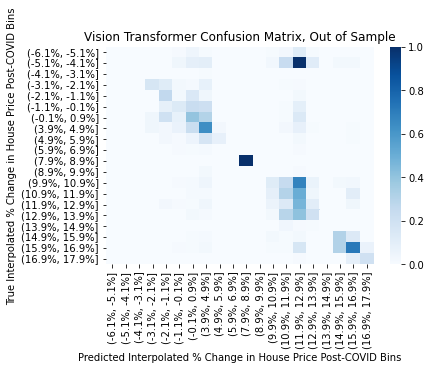

In [3]:
### Confusion Matrix 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

matrix = np.array([[ 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 1, 3, 10, 1, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 3, 10, 13, 0, 0, 0, 0, 4, 26, 85, 11, 0, 1, 3, 0],
                   [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 4, 4, 2, 2, 10, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 9, 2, 16, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 3, 10, 26, 27, 0, 0, 0, 0, 0, 1, 8, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 1, 7, 6, 44, 39, 0, 0, 0, 0, 0, 1, 12, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 1, 1, 5, 25, 80, 1, 0, 0, 0, 0, 3, 7, 1, 0, 0, 1, 0],
                   [ 0, 0, 0, 0, 1, 1, 6, 21, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0],
                   [ 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 1, 2, 6, 0, 0, 0, 0, 14, 27, 58, 6, 0, 1, 4, 0],
                   [ 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 11, 33, 43, 4, 0, 0, 13, 0],
                   [ 0, 0, 0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 7, 15, 40, 10, 0, 0, 5, 0],
                   [ 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 32, 35, 19, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 1, 2, 0, 0, 12, 17, 0],
                   [ 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 14, 0, 0, 12, 87, 1],
                   [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 11, 3]])

matrix = pd.DataFrame(matrix)
matrix.columns = ["(-6.1%, -5.1%]", "(-5.1%, -4.1%]", "(-4.1%, -3.1%]",
                  "(-3.1%, -2.1%]", "(-2.1%, -1.1%]", "(-1.1%, -0.1%]",
                   "(-0.1%, 0.9%]",   "(3.9%, 4.9%]",   "(4.9%, 5.9%]",
                    "(5.9%, 6.9%]",   "(7.9%, 8.9%]",   "(8.9%, 9.9%]",
                   "(9.9%, 10.9%]", "(10.9%, 11.9%]", "(11.9%, 12.9%]",
                  "(12.9%, 13.9%]", "(13.9%, 14.9%]", "(14.9%, 15.9%]",
                  "(15.9%, 16.9%]", "(16.9%, 17.9%]"]
matrix.index = ["(-6.1%, -5.1%]", "(-5.1%, -4.1%]", "(-4.1%, -3.1%]",
                  "(-3.1%, -2.1%]", "(-2.1%, -1.1%]", "(-1.1%, -0.1%]",
                   "(-0.1%, 0.9%]",   "(3.9%, 4.9%]",   "(4.9%, 5.9%]",
                    "(5.9%, 6.9%]",   "(7.9%, 8.9%]",   "(8.9%, 9.9%]",
                   "(9.9%, 10.9%]", "(10.9%, 11.9%]", "(11.9%, 12.9%]",
                  "(12.9%, 13.9%]", "(13.9%, 14.9%]", "(14.9%, 15.9%]",
                  "(15.9%, 16.9%]", "(16.9%, 17.9%]"]

# sns.heatmap(matrix, cmap = 'Blues')

confusion = sns.heatmap(matrix/np.sum(matrix, axis=1), cmap = 'Blues')
confusion.set_xlabel("Predicted Interpolated % Change in House Price Post-COVID Bins")
confusion.set_ylabel("True Interpolated % Change in House Price Post-COVID Bins")
confusion.set_xticklabels(confusion.get_xticklabels(),rotation = 90)
# confusion.figure.subplots_adjust(left = 0.3)
# plt.tight_layout()
# confusion.figure.subplots_adjust(bottom = 0.3)

confusion.set(title="Vision Transformer Confusion Matrix, Out of Sample")
confusion_file = os.path.join(path, 'saliency_maps', "confusion.png")
plt.savefig(confusion_file)
plt.show()